In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

In [3]:
with open('VDR_IC50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    vdr_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

suppl = Chem.SDMolSupplier('cdd2021/data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [09:42:35] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [09:42:35] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [09:42:35] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [09:42:36] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [09:42:36] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [09:42:36] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [09:42:36] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [09:42:36] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [09:42:36] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [09:42:36] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
RDKit ERROR: 
RDKit ERROR: [09:42:36] ERROR: Could not sanitize molecule ending on line 261581
RDKit ERROR

RDKit ERROR: [09:42:36] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 12
RDKit ERROR: 
RDKit ERROR: [09:42:36] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [09:42:36] ERROR: Could not sanitize molecule ending on line 499305
RDKit ERROR: [09:42:36] ERROR: Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [09:42:36] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [09:42:36] ERROR: Could not sanitize molecule ending on line 503342
RDKit ERROR: [09:42:36] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [09:42:36] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [09:42:36] ERROR: Could not sanitize molecule ending on line 508068
RDKit ERROR: [09:42:36] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [09:42:36] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 

In [4]:
# SMARTS-based chemical substructures are instantiated much like the standard SMILES-based mol instances:
ethanol_pattern = Chem.MolFromSmarts('CCO')
# and test our first substruct search

propanol = Chem.MolFromSmiles('CCCO') # a direct superstructure of ethanol
propanol.HasSubstructMatch(ethanol_pattern)

True

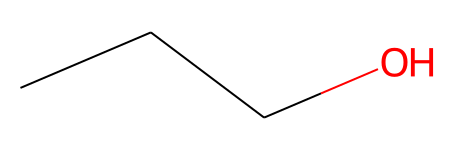

In [5]:
propanol

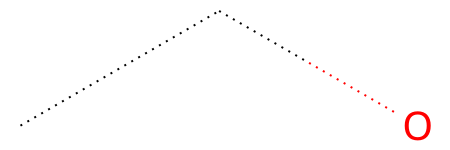

In [6]:
ethanol_pattern

In [7]:
toluene = Chem.MolFromSmiles('Cc1ccccc1')
toluene.HasSubstructMatch(ethanol_pattern)

False

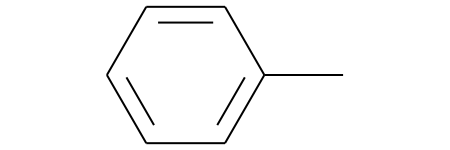

In [8]:
toluene

In [9]:
citric_acid = Chem.MolFromSmiles('OC(=O)CC(O)(C(=O)O)CC(=O)O')
citric_acid.HasSubstructMatch(ethanol_pattern)

True

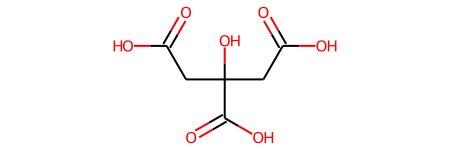

In [10]:
citric_acid

In [11]:
import itertools # for getting combinations without having to write additional function
hit_atoms = propanol.GetSubstructMatch(ethanol_pattern) # indices of matching atoms
hit_bonds = [propanol.GetBondBetweenAtoms(i, j).GetIdx()
             for i, j in itertools.combinations(hit_atoms, 2)
             if propanol.GetBondBetweenAtoms(i, j)]
hit_atoms, hit_bonds

((1, 2, 3), [1, 2])

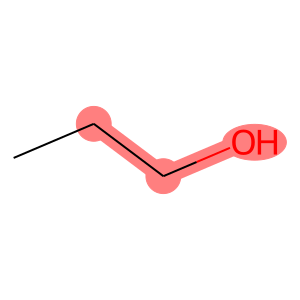

In [16]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
d = rdMolDraw2D.MolDraw2DSVG(300,300)
rdMolDraw2D.PrepareAndDrawMolecule(d, propanol, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
d.FinishDrawing()
display(SVG(d.GetDrawingText()))

In [17]:
import itertools
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

def visualize_match(structure, pattern):
    # GetSubstructMatches grabs all hits, GetSubstructMatch the first one it finds
    hits = structure.GetSubstructMatches(pattern)
    hit_atoms = set()
    hit_bonds = set()
    for hit in hits:
        hit_atoms.update(hit)
        hit_bonds.update([structure.GetBondBetweenAtoms(i, j).GetIdx()
                          for i, j in itertools.combinations(hit_atoms, 2)
                          if structure.GetBondBetweenAtoms(i, j)])
    d = rdMolDraw2D.MolDraw2DSVG(300,300)
    rdMolDraw2D.PrepareAndDrawMolecule(d, structure, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
    d.FinishDrawing()
    display(SVG(d.GetDrawingText()))

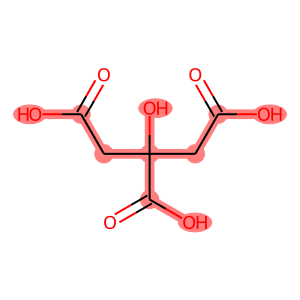

In [18]:
visualize_match(citric_acid, ethanol_pattern)

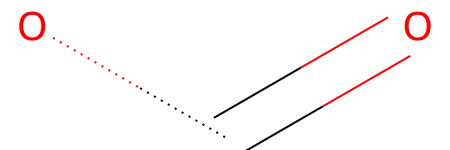

In [20]:
cooh_pattern = Chem.MolFromSmarts('C(=O)[O;h1]')
cooh_pattern

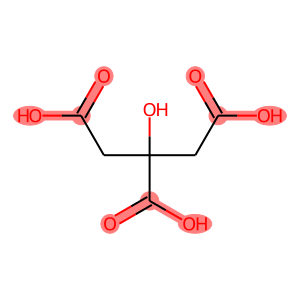

In [21]:
visualize_match(citric_acid, cooh_pattern)

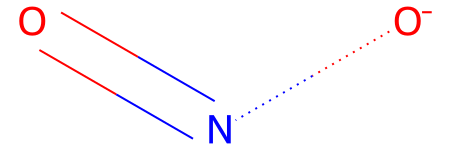

In [90]:
no = Chem.MolFromSmarts('[O-]N=O')
no

In [91]:
cooh_counts_vdr = [len(m.GetSubstructMatches(no)) for m in vdr_ligands]
cooh_counts_vdr_nonzero = [m for m in cooh_counts_vdr if m]
len(cooh_counts_vdr), len(cooh_counts_vdr_nonzero), sum(cooh_counts_vdr_nonzero)/len(cooh_counts_vdr_nonzero),\
max(cooh_counts_vdr_nonzero)


(643, 99, 1.0, 1)

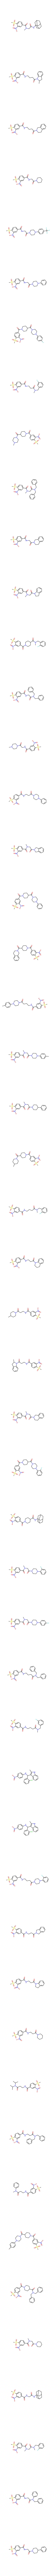

In [92]:
lots_of_cooh = [m for m, i in zip(vdr_ligands, cooh_counts_vdr) if i == 1]
Draw.MolsToGridImage(lots_of_cooh, molsPerRow=1, subImgSize=(500,500))

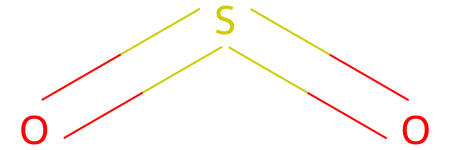

In [100]:
so = Chem.MolFromSmarts('O=S=O')

so

In [101]:
cooh_counts_vdr = [len(m.GetSubstructMatches(so)) for m in vdr_ligands]
cooh_counts_vdr_nonzero = [m for m in cooh_counts_vdr if m]
len(cooh_counts_vdr), len(cooh_counts_vdr_nonzero), sum(cooh_counts_vdr_nonzero)/len(cooh_counts_vdr_nonzero),\
max(cooh_counts_vdr_nonzero)

(643, 122, 1.0655737704918034, 2)

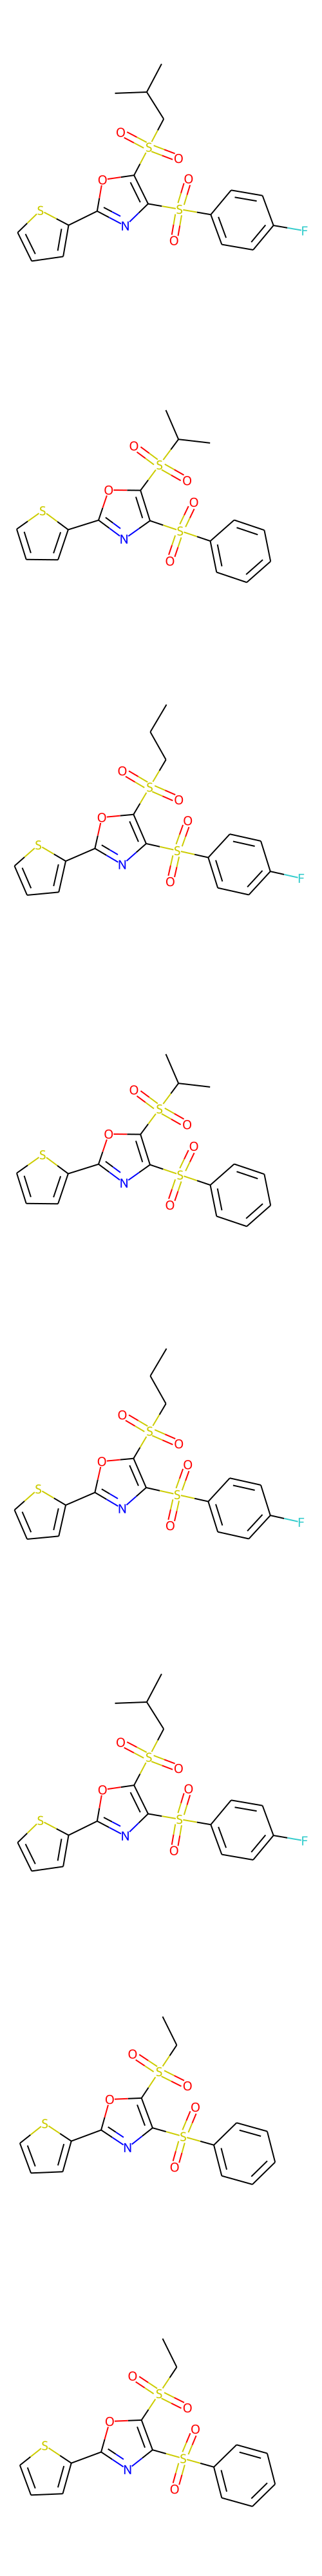

In [102]:
lots_of_cooh = [m for m, i in zip(vdr_ligands, cooh_counts_vdr) if i == 2]
Draw.MolsToGridImage(lots_of_cooh, molsPerRow=1, subImgSize=(500,500))

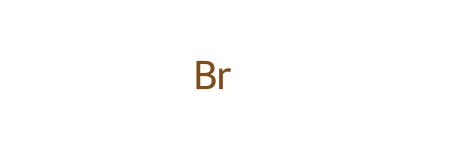

In [103]:
b = Chem.MolFromSmarts('Br')
b

In [104]:
cooh_counts_vdr = [len(m.GetSubstructMatches(b)) for m in vdr_ligands]
cooh_counts_vdr_nonzero = [m for m in cooh_counts_vdr if m]
len(cooh_counts_vdr), len(cooh_counts_vdr_nonzero), sum(cooh_counts_vdr_nonzero)/len(cooh_counts_vdr_nonzero),\
max(cooh_counts_vdr_nonzero)

(643, 2, 1.0, 1)

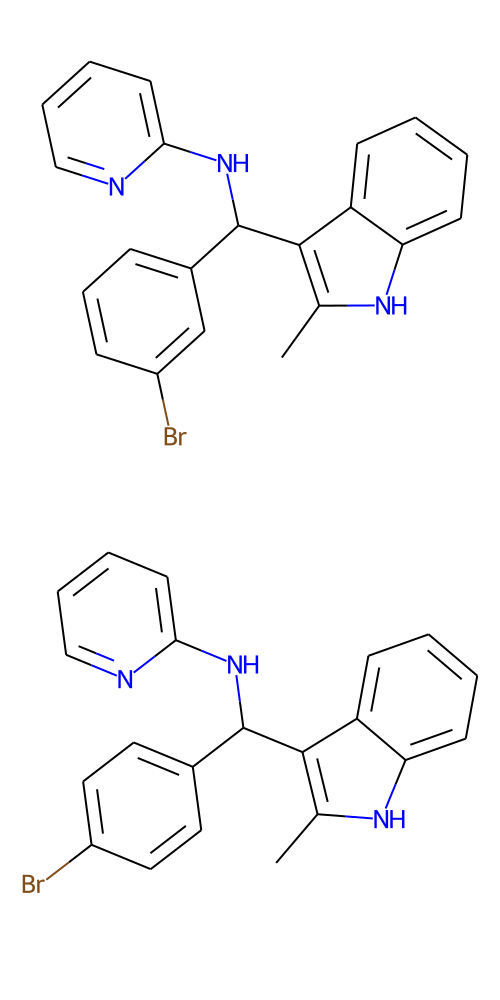

In [106]:
lots_of_cooh = [m for m, i in zip(vdr_ligands, cooh_counts_vdr) if i == 1]
Draw.MolsToGridImage(lots_of_cooh, molsPerRow=1, subImgSize=(500,500))

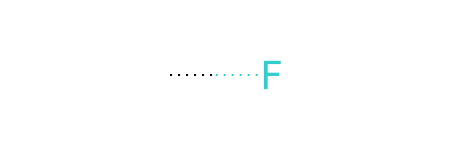

In [84]:
cf = Chem.MolFromSmarts('CF')
cf

In [85]:
cooh_counts_vdr = [len(m.GetSubstructMatches(cf)) for m in vdr_ligands]
cooh_counts_vdr_nonzero = [m for m in cooh_counts_vdr if m]
len(cooh_counts_vdr), len(cooh_counts_vdr_nonzero), sum(cooh_counts_vdr_nonzero)/len(cooh_counts_vdr_nonzero),\
max(cooh_counts_vdr_nonzero)
#max skupiny COOH jenom 2

(643, 23, 2.9565217391304346, 4)

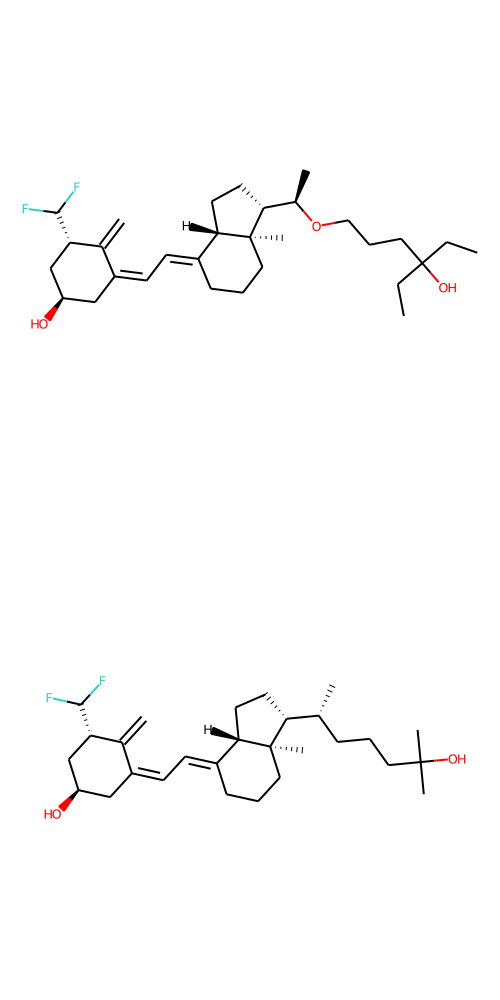

In [86]:
lots_of_cooh = [m for m, i in zip(vdr_ligands, cooh_counts_vdr) if i == 2]
Draw.MolsToGridImage(lots_of_cooh, molsPerRow=1, subImgSize=(500,500))

In [53]:
cooh_counts_vdr = [len(m.GetSubstructMatches(cooh_pattern)) for m in vdr_ligands]
cooh_counts_vdr_nonzero = [m for m in cooh_counts_vdr if m]
len(cooh_counts_vdr), len(cooh_counts_vdr_nonzero), sum(cooh_counts_vdr_nonzero)/len(cooh_counts_vdr_nonzero),\
max(cooh_counts_vdr_nonzero)
#max skupiny COOH jenom 2

(643, 74, 1.027027027027027, 2)

/home/valeriia/anaconda3/envs/pnl/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:190: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


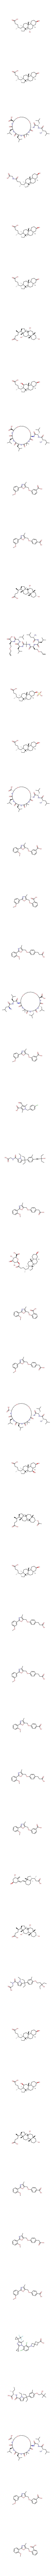

In [62]:
lots_of_cooh = [m for m, i in zip(vdr_ligands, cooh_counts_vdr) if i == 1]
Draw.MolsToGridImage(lots_of_cooh, molsPerRow=1, subImgSize=(500,500))

In [23]:
cooh_counts_drugbank = [len(m.GetSubstructMatches(cooh_pattern)) for m in drugs]
cooh_counts_drugbank_nonzero = [m for m in cooh_counts_drugbank if m]
len(cooh_counts_drugbank), len(cooh_counts_drugbank_nonzero),\
sum(cooh_counts_drugbank_nonzero)/len(cooh_counts_drugbank_nonzero),\
max(cooh_counts_drugbank_nonzero)

(7113, 1635, 1.2574923547400612, 8)

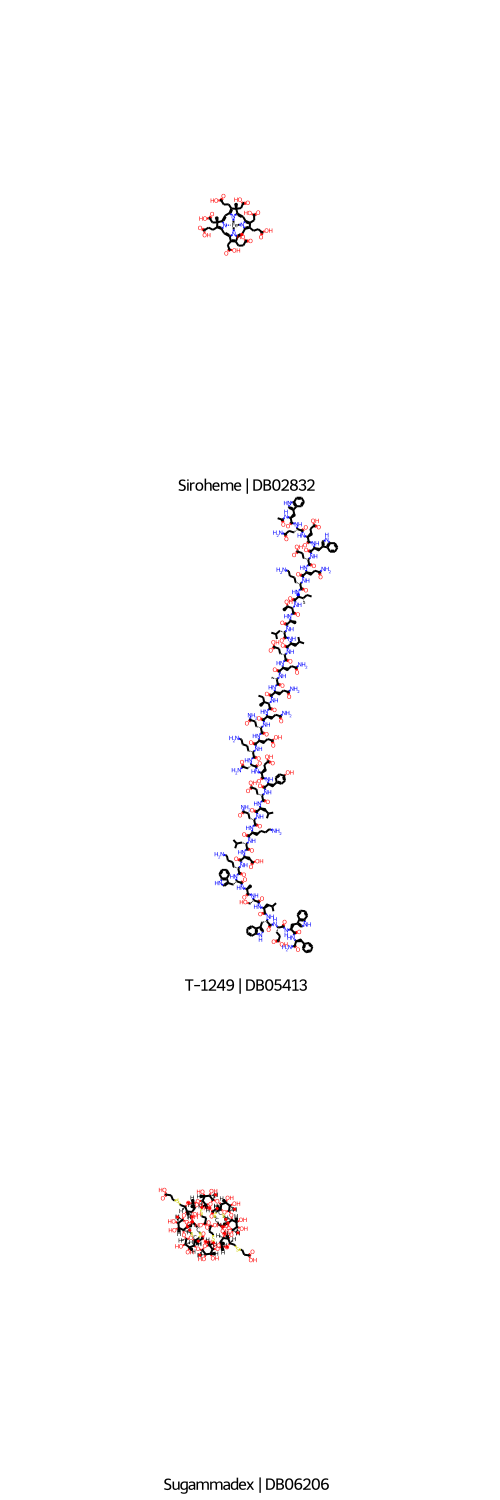

In [25]:
lots_of_cooh = [m for m, i in zip(drugs, cooh_counts_drugbank) if i == 8]
Draw.MolsToGridImage(lots_of_cooh, molsPerRow=1, subImgSize=(500,500),
                     legends=["{} | {}".format(m.GetProp('GENERIC_NAME'), m.GetProp('DRUGBANK_ID'))
                              for m in lots_of_cooh])

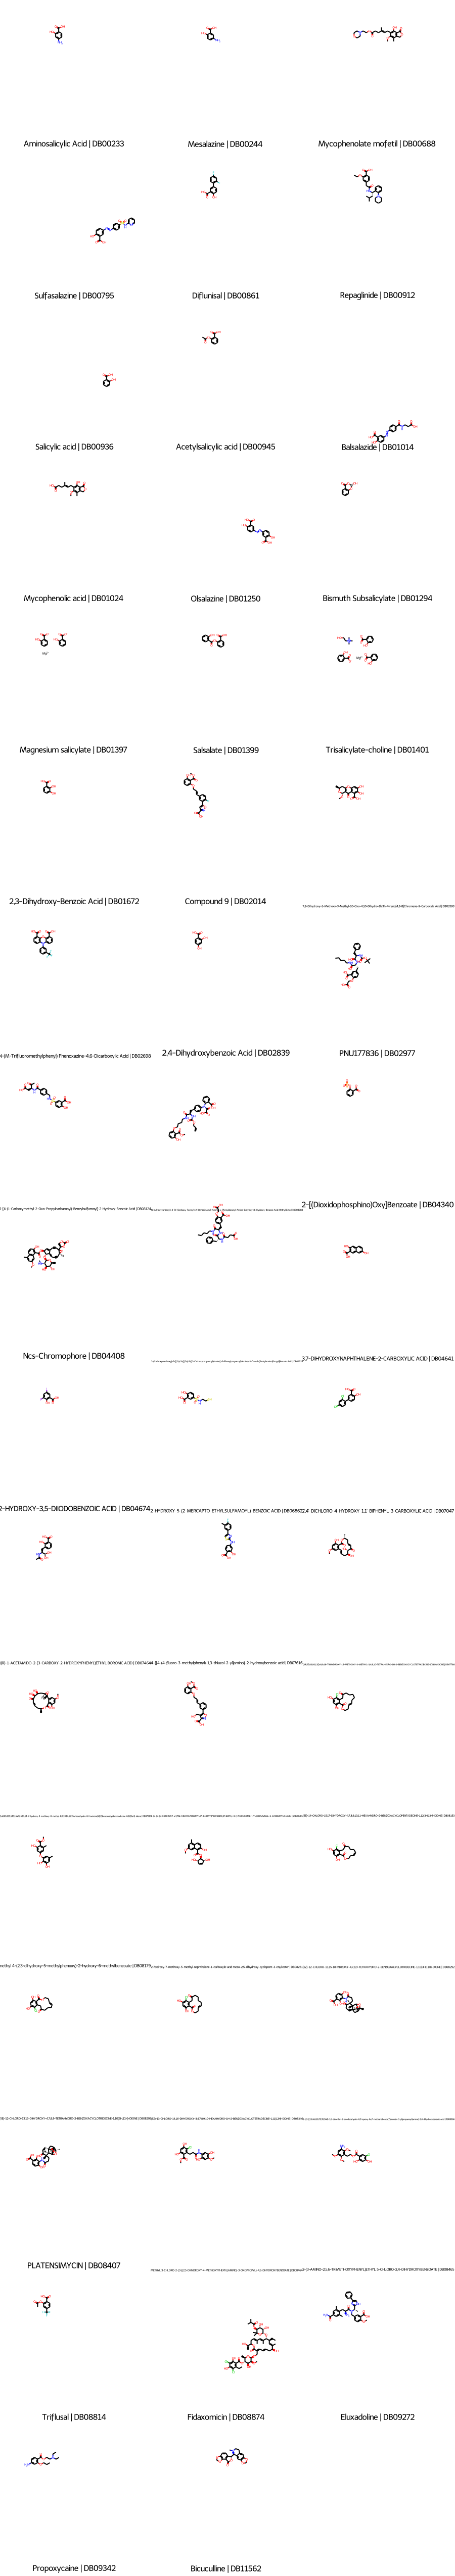

In [26]:
salicylic_acid_pattern = Chem.MolFromSmarts('c1ccc(c(c1)C(=O)O)O')
# get all salicylic acid derivates from DrugBank
drugbank_salicylics = [m for m in drugs if m.HasSubstructMatch(salicylic_acid_pattern)]
Draw.MolsToGridImage(drugbank_salicylics, molsPerRow=3, subImgSize=(300,300),
                     legends=["{} | {}".format(m.GetProp('GENERIC_NAME'), m.GetProp('DRUGBANK_ID'))
                              for m in drugbank_salicylics])

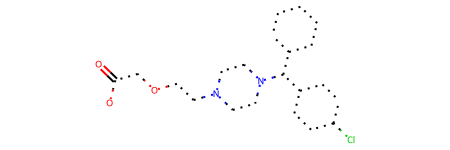

In [27]:
cetirizine_pattern = Chem.MolFromSmarts('Clc1ccc(cc1)C(c2ccccc2)N3CCN(CC3)CCOCC(=O)O')
cetirizine_pattern

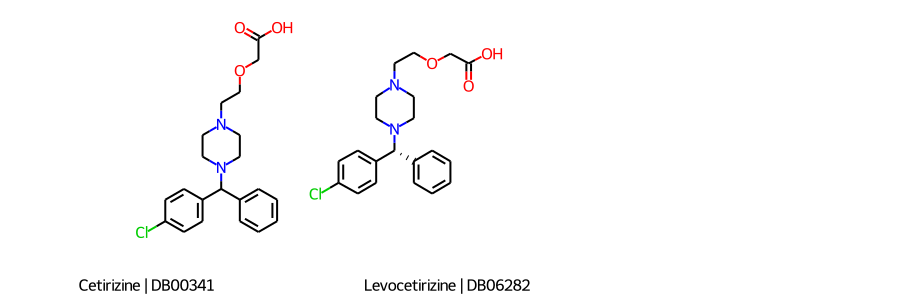

In [28]:
drugbank_cetirizine = [m for m in drugs if m.HasSubstructMatch(cetirizine_pattern)]
Draw.MolsToGridImage(drugbank_cetirizine, molsPerRow=3, subImgSize=(300,300),
                     legends=["{} | {}".format(m.GetProp('GENERIC_NAME'), m.GetProp('DRUGBANK_ID'))
                              for m in drugbank_cetirizine])

In [32]:
from itertools import chain
# load PAINS structures in SMARTS format from two files in data
pains = []
with open('cdd2021/data/pains/p_l15.txt', 'r') as f, open('cdd2021/data/pains/p_m150.txt', 'r') as p:
    for line in chain(f, p):
        pattern, text = line.strip().split('\t') # split by tab
        pains.append([Chem.MolFromSmarts(pattern),
                      text.lstrip("<regId=\"").rstrip("\">")]) # remove the xml tags
pains, len(pains)

([[<rdkit.Chem.rdchem.Mol at 0x7fe0b91afda0>, 'anil_di_alk_F(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x7fe0b91b1f30>, 'hzone_anil(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x7fe0b91af080>, 'het_5_pyrazole_OH(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x7fe0b91b7490>, 'het_thio_666_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7fe0b91b74e0>, 'styrene_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7fe0b91b7580>, 'ne_rhod_C(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7fe0b91b7620>, 'hp_amino_CN_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7fe0b91b7670>, 'cyano_imine_C(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7fe0b91b76c0>, 'thio_urea_A(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7fe0b91b7760>, 'thiophene_amino_B(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7fe0b91b7800>, 'keto_keto_beta_B(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7fe0b91b7850>, 'keto_phenone_A(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x7fe0b91b78f0>, 'cyano_pyridone_C(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x7fe0b91b7990>, 'thiaz_ene_C(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x7fe0b91b7a30>, '

In [33]:
for m in vdr_ligands: # for each ligand
    # add a variable that stores indices of all PAINS patterns that match it
    m.pain_hits = [i for i, pain in enumerate(pains) if m.HasSubstructMatch(pain[0])]

vdr_with_pains = [m for m in vdr_ligands if m.pain_hits]
vdr_with_pains

#jenom dve molekuly
# a jsou stejne

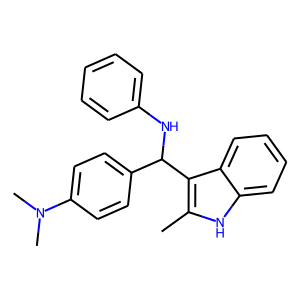

In [35]:
Draw.MolToImage(vdr_with_pains[0])


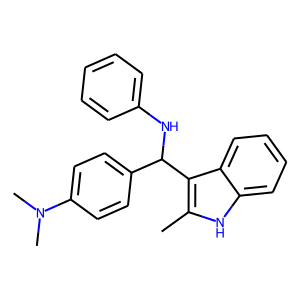

In [38]:
Draw.MolToImage(vdr_with_pains[1])

In [39]:
vdr_with_pains[0].pain_hits, pains[vdr_with_pains[0].pain_hits[0]]

([422], [<rdkit.Chem.rdchem.Mol at 0x7fe0b91ca940>, 'anil_di_alk_D(198)'])

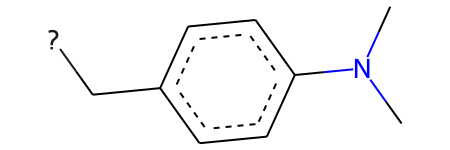

In [40]:
pains[vdr_with_pains[0].pain_hits[0]][0]

In [42]:
vdr_with_pains[1].pain_hits, pains[vdr_with_pains[1].pain_hits[0]]

([422], [<rdkit.Chem.rdchem.Mol at 0x7fe0b91ca940>, 'anil_di_alk_D(198)'])

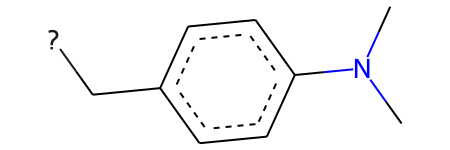

In [44]:
pains[vdr_with_pains[1].pain_hits[0]][0]

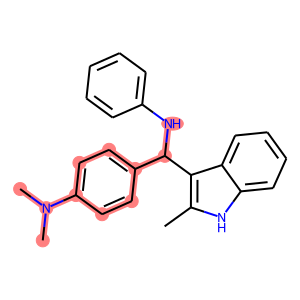

In [45]:
visualize_match(vdr_with_pains[0], pains[vdr_with_pains[0].pain_hits[0]][0])

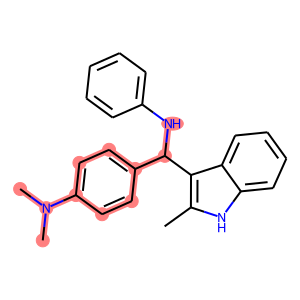

In [49]:
visualize_match(vdr_with_pains[1], pains[vdr_with_pains[1].pain_hits[0]][0])